### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [22]:
import numpy as np
import secrets
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [23]:
fileN = 'sample-2'

rate, data = wavfile.read(f'{fileN}.wav')

gen = secrets.SystemRandom()

dt = 1/rate
t = np.linspace(0, (len(data)-1)*dt, len(data))
minsignal, maxsignal = data.min(), data.max()

# Compute Fourier Transform
n = len(data)
fhat = np.fft.fft(data, n)  # computes the fft
sh_freq = np.zeros(n, fhat.dtype)
fac = gen.random() * 35 + 10
S = int(np.round(fac if gen.randint(0,1) else n - fac, 0))
s = int(n-S)
sh_freq[:S] = fhat[s:]
sh_freq[S:] = fhat[:s]
sh_chunk = np.fft.ifft(sh_freq)

/home/vic/.local/share/virtualenvs/course-repo-fBrog0EP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/vic/.local/share/virtualenvs/course-repo-fBrog0EP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


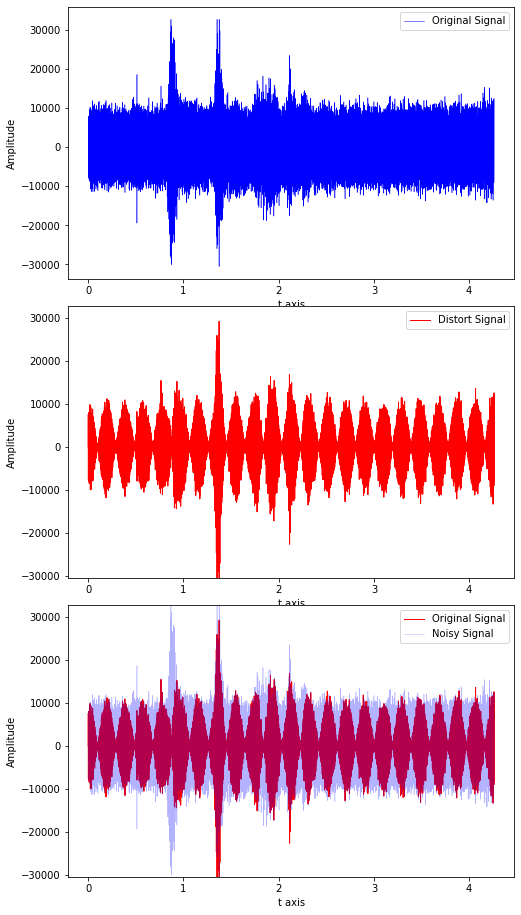

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(8, 16))
ax[0].plot(t, data, color='b', lw=0.5, label='Original Signal')
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Amplitude')
ax[0].legend()

ax[1].plot(t, sh_chunk, color='r', lw=1, label='Distort Signal')
ax[1].set_ylim([minsignal, maxsignal])
ax[1].set_xlabel('t axis')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(t, sh_chunk, color='r', lw=1, label='Original Signal')
ax[2].plot(t, data, color='b', lw=0.5, label='Noisy Signal', alpha=0.3)
ax[2].set_ylim([minsignal, maxsignal])
ax[2].set_xlabel('t axis')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

plt.subplots_adjust(hspace=0.1)
plt.show()

In [25]:
wavfile.write(f'{fileN}-distort.wav', rate, sh_chunk.astype(data.dtype))

/tmp/ipykernel_37413/116074438.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write(f'{fileN}-distort.wav', rate, sh_chunk.astype(data.dtype))


In [26]:
from IPython.core.display import HTML


def wavPlayer(filepath):
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """ % (filepath)
    display(HTML(src))

In [27]:
wavPlayer(f'{fileN}.wav')

In [28]:
wavPlayer(f'{fileN}-distort.wav')

In [29]:
wavPlayer('sample-1.wav')

In [30]:
wavPlayer('sample-1-distort.wav')

In [31]:
wavPlayer('sample-2.wav')

In [32]:
wavPlayer('sample-2-distort.wav')